# Guided Capstone Step 4 - Pre-processing and Training Data Development

### **The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   **Pre-processing and Training Data Development**

5.  Modeling
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

In this step of the guided capstone, you'll revisit some of the steps you completed to solve questions in step 4. Revisiting these steps will help you get additional practice completing this kind of work.

**<font color='teal'> Start by loading the necessary packages, as you've done in the previous steps. Print out your current working directory to confirm that you are in the correct project directory. </font>**

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                         
import seaborn as sns
from scipy import stats
%matplotlib inline

**<font color='teal'>  Load the csv file you created in step 3. Remember, it should be saved inside your data subfolder. Print the first five rows.</font>**

In [2]:
df = pd.read_csv('/Users/tupran/Documents/Data/GitHub/GuidedCapstone/data/step3_output.csv', index_col=0)
df.head()

,state,summit_elev,vertical_drop,base_elev,fastSixes,fastQuads,quad,triple,double,surface,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,cluster
Name,,,,,,,,,,,,,,,,,,,,,
Eaglecrest Ski Area,Alaska,2600,1540,1200,0,0,0,0,4,0,...,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0.0,0
Hilltop Ski Area,Alaska,2090,294,1796,0,0,0,1,0,2,...,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0,0
Arizona Snowbowl,Arizona,11500,2300,9200,1,0,2,2,1,2,...,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,0.0,1
Sunrise Park Resort,Arizona,11100,1800,9200,0,1,2,3,1,0,...,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0,1
Yosemite Ski & Snowboard Area,California,7800,600,7200,0,0,0,1,3,1,...,88.0,0.0,110.0,84.0,300.0,47.0,47.0,107.0,0.0,2


## Create dummy features for categorical variables

**<font color='teal'> Create dummy variables for `State`. Add the dummies back to the dataframe and remove the original column for `State`. </font>**

In [3]:
df.reset_index(inplace=True)
dfs = df.drop('state', axis=1)
dfo = pd.get_dummies(df['state'], prefix='state')
df = pd.concat([dfs,dfo], axis=1)

In [4]:
df

,Name,summit_elev,vertical_drop,base_elev,fastSixes,fastQuads,quad,triple,double,surface,...,state_Rhode Island,state_South Dakota,state_Tennessee,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
0,Eaglecrest Ski Area,2600,1540,1200,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
1,Hilltop Ski Area,2090,294,1796,0,0,0,1,0,2,...,0,0,0,0,0,0,0,0,0,0
2,Arizona Snowbowl,11500,2300,9200,1,0,2,2,1,2,...,0,0,0,0,0,0,0,0,0,0
3,Sunrise Park Resort,11100,1800,9200,0,1,2,3,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Yosemite Ski & Snowboard Area,7800,600,7200,0,0,0,1,3,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,Meadowlark Ski Lodge,9500,1000,8500,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
274,Sleeping Giant Ski Resort,7428,810,6619,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
275,Snow King Resort,7808,1571,6237,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
276,Snowy Range Ski & Recreation Area,9663,990,8798,0,0,0,1,3,1,...,0,0,0,0,0,0,0,0,0,1


## Standardize the magnitude of numeric features

**<font color='teal'> Using sklearn preprocessing, standardize the scale of the features of the dataframe except the name of the resort, which you don't need in the dataframe for modeling so it can be droppped here as well. You should  hold out your response variable(s) so that you can have their true values available for model performance review. Let's set `AdultWeekend` to the y variable as your response for scaling and modeling. Later, you will go back and consider the `AdultWeekday`, `dayOpenLastYear`, and `projectedDaysOpen`. For now leave, them in the development dataframe. </font>**

In [5]:
features = ['summit_elev', 'vertical_drop', 'base_elev','fastSixes','fastQuads',
            'quad', 'triple', 'double', 'surface','Runs', 'TerrainParks', 
            'LongestRun_mi', 'SkiableTerrain_ac','Snow Making_ac', 
            'daysOpenLastYear', 'yearsOpen', 'averageSnowfall',
            'AdultWeekday', 'projectedDaysOpen', 'NightSkiing_ac','state_Arizona', 
            'state_California','state_Colorado', 'state_Connecticut', 'state_Idaho',
            'state_Illinois','state_Indiana', 'state_Iowa', 'state_Maine', 
            'state_Maryland','state_Massachusetts', 'state_Michigan', 'state_Minnesota',
            'state_Missouri', 'state_Montana', 'state_Nevada',
            'state_New Hampshire', 'state_New Jersey', 'state_New Mexico',
            'state_New York', 'state_North Carolina', 'state_Ohio', 'state_Oregon',
            'state_Pennsylvania', 'state_Rhode Island', 'state_South Dakota',
            'state_Tennessee', 'state_Utah', 'state_Vermont', 'state_Virginia',
            'state_Washington', 'state_West Virginia', 'state_Wisconsin',
            'state_Wyoming']

In [6]:
# dropping Name column (name of the resort) & Response variable AdultWeekend from X
y = df[['AdultWeekend']]
X = df[features]
y


,AdultWeekend
0,53.00000
1,34.00000
2,89.00000
3,78.00000
4,47.00000
...,...
273,64.16681
274,42.00000
275,59.00000
276,49.00000


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_s = scaler.fit_transform(X)

In [8]:
X_s

array([[-0.45277491,  0.67809487, -0.64180356, ..., -0.12082442,
        -0.24712083, -0.16071795],
       [-0.59946512, -0.9858604 , -0.44401738, ..., -0.12082442,
        -0.24712083, -0.16071795],
       [ 2.1071132 ,  1.69302745,  2.01304454, ..., -0.12082442,
        -0.24712083, -0.16071795],
       ...,
       [ 1.04519108,  0.71949343,  1.02975517, ..., -0.12082442,
        -0.24712083,  6.2220805 ],
       [ 1.57874079, -0.05639582,  1.87963842, ..., -0.12082442,
        -0.24712083,  6.2220805 ],
       [ 1.53185745,  0.09050232,  1.74755973, ..., -0.12082442,
        -0.24712083,  6.2220805 ]])

## Split into training and testing datasets

**<font color='teal'> Using sklearn model selectionm import train_test_split, and create a 75/25 split with the y = `AdultWeekend`. You will start by using the adult weekend ticket price as your response variable for modeling.</font>**

Here, you'll start the actual modeling work. First let's fit a multiple linear regression model to predict the `AdultWeekend` price.

# Guided Capstone Step 5 - Modeling

You've cleaned and prepared the datasets, so now it's time to get into the most exciting part of this process: modeling! In this exercise, you will build three different models and compare each model's performance. In the end, you will choose the best model for proving insights to Big Mountain management.  

1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.   **Modeling**
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

## Fit Models with Training Data Set

**<font color='teal'> Using sklearn, fit the model on your training dataset.</font>**

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_s,y,test_size=0.25, random_state = 1)

#### Model 1

In [10]:
#all first model set
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

**<font color='teal'> Predict on the testing dataset and score the model performance with the y_test set and the y-pred values. The explained variance is a measure of the variation explained by the model. This is also known as the R-squared value. </font>**

In [11]:
y_pred = lm.predict(X_test)

## Review Model Outcomes — Iterate over additional models as needed.

In [12]:
y_test1 = y_test.copy()
y_test1['predict'] = y_pred
y_test1

,AdultWeekend,predict
11,59.00000,52.128369
73,40.00000,40.167368
146,79.99000,90.320971
79,65.00000,51.796569
266,44.00000,38.884611
...,...,...
138,64.16681,74.073005
189,65.00000,66.389029
222,65.00000,44.315844
225,59.00000,70.572875


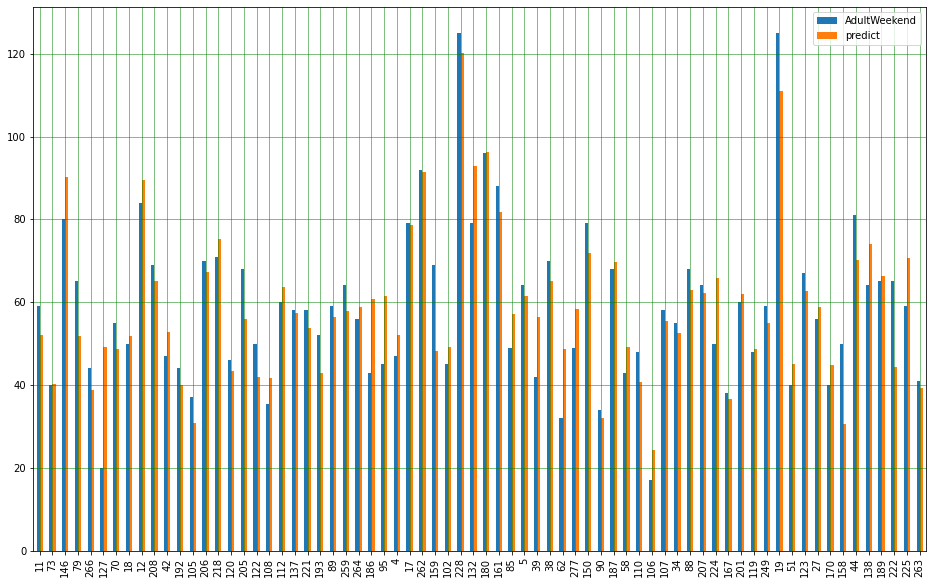

In [13]:
y_test1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

**<font color='teal'> Print the intercept value from the linear model. </font>**

In [14]:
#The intercept is the mean AdultWeekend price for all the resorts given the other characteristics. 
print('The intercept, mean of AdultWeekend price is :', lm.intercept_)

The intercept, mean of AdultWeekend price is : [60.97676843]


**<font color='teal'> The intercept is the mean `AdultWeekend` price for all the resorts given the other characteristics. The addition or subtraction of each of the coefficient values in the regression are numeric adjustments applied to the intercept to provide a particular observation's value for the `AdultWeekend` resulting value. Also, because you took the time to scale your x values in the training data, you can compare each of the coefficients for the features to determine the feature's importance. Print the coefficient values from the linear model and sort in descending order to identify the top ten most important features.</font>** 

Hint: make sure to review the absolute value of the coefficients, because the adjustment may be positive or negative, but what you are looking for is the magnitude of impact on your response variable.

In [15]:
top_feat = pd.DataFrame(X.columns)
top_feat.columns = ['Features']
slope = lm.coef_.reshape(-1,1)
top_feat['Coef'] = slope
top_feat.sort_values(by='Coef',ascending=False)

,Features,Coef
2,base_elev,4.222776e+01
17,AdultWeekday,1.325609e+01
1,vertical_drop,9.696809e+00
36,state_New Hampshire,2.795158e+00
40,state_North Carolina,2.642766e+00
30,state_Massachusetts,2.412419e+00
6,triple,2.254325e+00
28,state_Maine,2.050988e+00
35,state_Nevada,1.749734e+00
5,quad,1.621123e+00


In [16]:
print('R2 Score with all Features:', lm.score(X_test, y_test))
print('Mean Absolute Error with all Features:', mean_absolute_error(y_test, y_pred))
print('The Explained Variance Score is :', explained_variance_score(y_test, y_pred))

R2 Score with all Features: 0.7814415256966798
Mean Absolute Error with all Features: 6.919598672628268
The Explained Variance Score is : 0.7814656680984373


In [17]:
y_test.shape, y_pred.shape

((70, 1), (70, 1))

**<font color='teal'>You should see that the top ten important features are different states. However, the state is not something the managers at the Big Mountain Resort can do anything about. Given that you care more about actionable traits associated with ticket pricing, rebuild the model without the state features and compare the results. </font>**

#### Model 2

In [18]:
new_features = ['summit_elev', 'vertical_drop', 'base_elev','fastSixes','fastQuads',
            'quad', 'triple', 'double', 'surface','Runs', 'TerrainParks', 
            'LongestRun_mi', 'SkiableTerrain_ac','Snow Making_ac', 
            'daysOpenLastYear', 'yearsOpen', 'averageSnowfall',
            'AdultWeekday', 'projectedDaysOpen', 'NightSkiing_ac']

X_ns = df[new_features]
scaler1 = StandardScaler()
X_ns = scaler1.fit_transform(X_ns)

In [19]:
Xns_train, Xns_test, yns_train, yns_test = train_test_split(X_ns,y,test_size=0.25, random_state = 1)
mlm = linear_model.LinearRegression()
model1 = mlm.fit(Xns_train,yns_train)
yns_pred = mlm.predict(Xns_test)

In [20]:
X_ns.shape

(278, 20)

In [21]:
print(mlm.intercept_)

[61.01989188]


In [22]:
df_ns = pd.DataFrame(df[new_features].columns)
df_ns.columns = ['Features']
slope1 = mlm.coef_.reshape(-1,1)
df_ns['Coef'] = slope1
df_ns.sort_values(by='Coef',ascending=False)

,Features,Coef
17,AdultWeekday,14.238261
2,base_elev,9.803921
1,vertical_drop,4.753465
5,quad,1.729322
4,fastQuads,1.674596
6,triple,1.540535
18,projectedDaysOpen,1.159299
9,Runs,1.023128
7,double,0.970388
3,fastSixes,0.823880


In [23]:
y_test2 = yns_test.copy()
y_test2['predict'] = yns_pred
y_test2

,AdultWeekend,predict
11,59.00000,56.275412
73,40.00000,32.123745
146,79.99000,87.082152
79,65.00000,54.858159
266,44.00000,39.902999
...,...,...
138,64.16681,72.336024
189,65.00000,50.119177
222,65.00000,48.331581
225,59.00000,56.783175


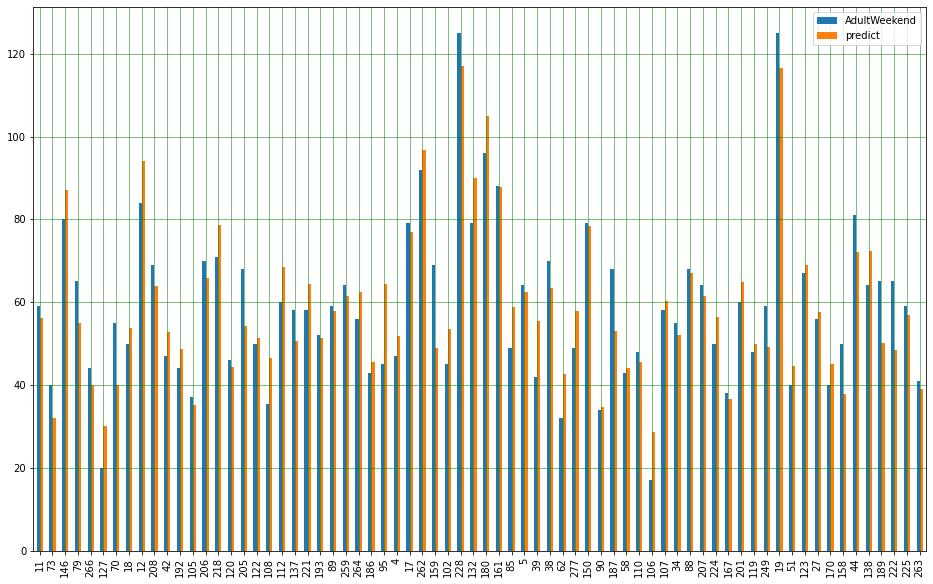

In [24]:
y_test2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [25]:
print('R2 Score without state Feature:', mlm.score(Xns_test, yns_test))
print('Mean Absolute Error without state Feature:', mean_absolute_error(yns_test, yns_pred))
print('The Explained Variance Score is :', explained_variance_score(yns_test, yns_pred))

R2 Score without state Feature: 0.8270263395396463
Mean Absolute Error without state Feature: 6.480121754313089
The Explained Variance Score is : 0.8272151230576815


**<font color='teal'> When reviewing your new model coefficients, note that `summit_elev` is now in the number two spot. From a managerial perspective, this is also difficult to change and highly correlated with `base_elev` and `vertical_drop`.  This time rebuild the model without the state features and without the `summit_elev` and without `base_elev`and compare the results. </font>**

#### Model 3

In [26]:
n_features = ['vertical_drop','fastSixes','fastQuads',
            'quad', 'triple', 'double', 'surface','Runs', 'TerrainParks', 
            'LongestRun_mi', 'SkiableTerrain_ac','Snow Making_ac', 
            'daysOpenLastYear', 'yearsOpen', 'averageSnowfall',
            'AdultWeekday', 'projectedDaysOpen', 'NightSkiing_ac']

X_nsb = df[n_features]
scaler1 = StandardScaler()
x_nsb = scaler1.fit_transform(X_nsb)
x_nsb.shape

(278, 18)

In [27]:
Xnsb_train, Xnsb_test, ynsb_train, ynsb_test = train_test_split(x_nsb,y,test_size=0.25, random_state = 1)
mlmb = linear_model.LinearRegression()
model = mlmb.fit(Xnsb_train,ynsb_train)
ynsb_pred=mlmb.predict(Xnsb_test)

In [28]:
print(mlmb.score(Xnsb_test,ynsb_test))
print(mlmb.intercept_)

0.8267861614793024
[61.03745075]


In [29]:
df_nsb = pd.DataFrame(df[n_features].columns)
df_nsb.columns = ['Features']
slope2 = mlmb.coef_.reshape(-1,1)
df_nsb['Coef'] = slope2
df_nsb.sort_values(by='Coef',ascending=False)

,Features,Coef
15,AdultWeekday,14.209178
0,vertical_drop,1.899245
2,fastQuads,1.804775
3,quad,1.700005
4,triple,1.514207
16,projectedDaysOpen,1.090611
5,double,1.070774
7,Runs,1.051688
1,fastSixes,0.912725
17,NightSkiing_ac,0.757118


In [30]:
y_test3 = ynsb_test.copy()
y_test3['predict'] = ynsb_pred
y_test3

,AdultWeekend,predict
11,59.00000,55.850188
73,40.00000,31.937869
146,79.99000,87.086699
79,65.00000,53.790207
266,44.00000,40.073821
...,...,...
138,64.16681,71.465544
189,65.00000,50.807502
222,65.00000,48.282202
225,59.00000,56.993488


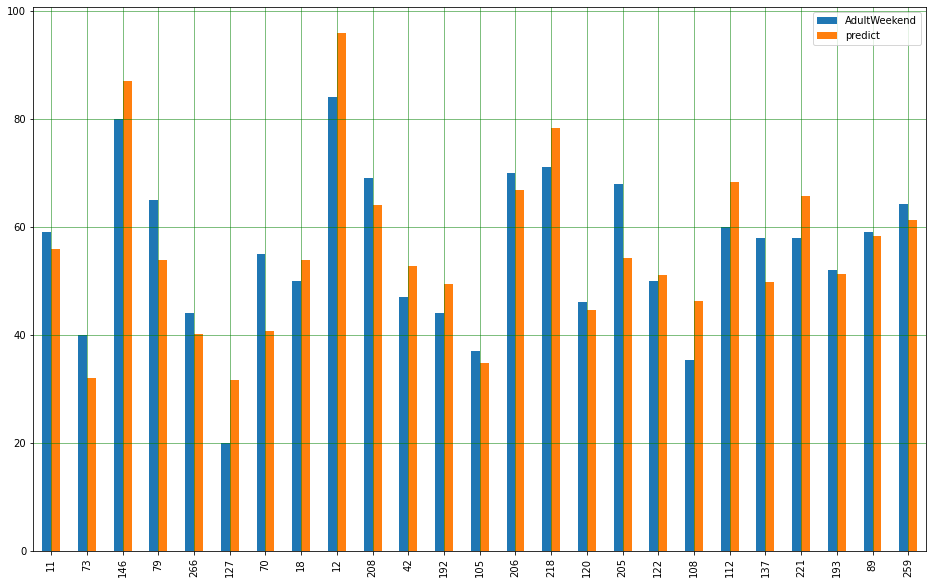

In [31]:
y_test3.head(25).plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [32]:
print('R2 Score without 3 Feature:', mlmb.score(Xnsb_test, ynsb_test))
print('Mean Absolute Error without 3 Feature:', mean_absolute_error(ynsb_test, ynsb_pred))
print('The Explained Variance Score is :', explained_variance_score(ynsb_test, ynsb_pred))

R2 Score without 3 Feature: 0.8267861614793024
Mean Absolute Error without 3 Feature: 6.525817362617325
The Explained Variance Score is : 0.8270866200315898


## Identify the Final Model

**<font color='teal'> Review the model performances in the table below and choose the best model for proving insights to Big Mountain management about what features are driving ski resort lift ticket prices. Type your choice in the final markdown cell. You will explain your selection during the next step of the guided casptone. </font>**

| Model | Explained Variance| Mean Absolute Error|Features Dropped|
| --- | --- | --- | --- |
| Model 1. | 78.14 | 6.19 |-|
| Model 2. | 82.72| 6.48|'state'|
| Model 3. | 82.70 | 6.52|'state','summit_elev','base_elev'|

Model Selection:

# Model 2 with MAE of 6.48 and a R2 of 82.72% score is the best model